In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Linear Congruential generator

For a given modulus m, m > 0, one chooses 
* a multiplier $a$, $0 \leq a < m$, 
* an increment $c$, $0 \leq c < m$, and 
* a starting value $I_0$, $0 \leq I_0 < m$ (known as the **seed**) 


and constructs the sequence


$$ I_{n+1} = (aI_n+c)\, \text{mod} \, m \qquad n = 0,1,2,\dots,$$

In [12]:
## Choose parameters for the linear congruential generator

I_0 = 5 # Choose seed 
m = 2**31 - 1
a = 7**5
c = 0 

In [13]:
runs = 10000

I = np.zeros((runs+1,), dtype =  np.int32)
I[0] = I_0
for i in range(runs):
    I[i+1] = np.mod(a*I[i]+c,m) 


Text(0.5, 1.0, '(pseudo) random numbers')

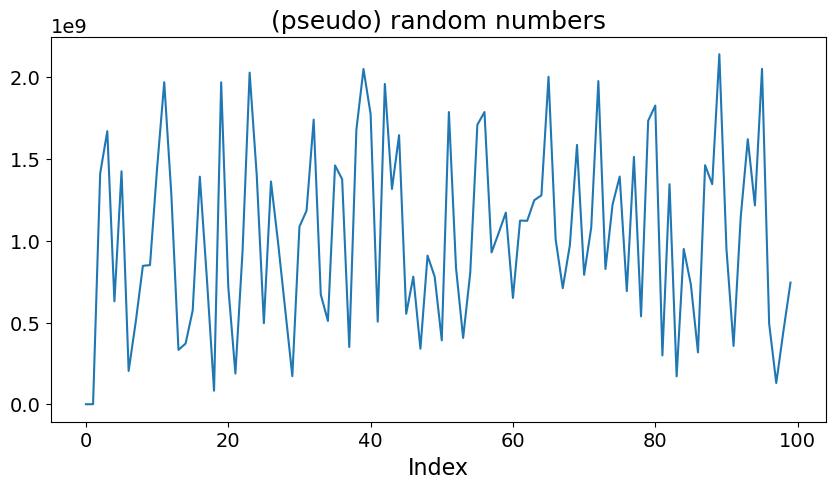

In [14]:
# Plot the first 100 terms in the sequence
plt.plot(I[:100])
plt.xlabel('Index', fontsize = 16)
plt.title('(pseudo) random numbers', fontsize = 18)

## Uniform random variables

Text(0.5, 1.0, 'NumPy implementation')

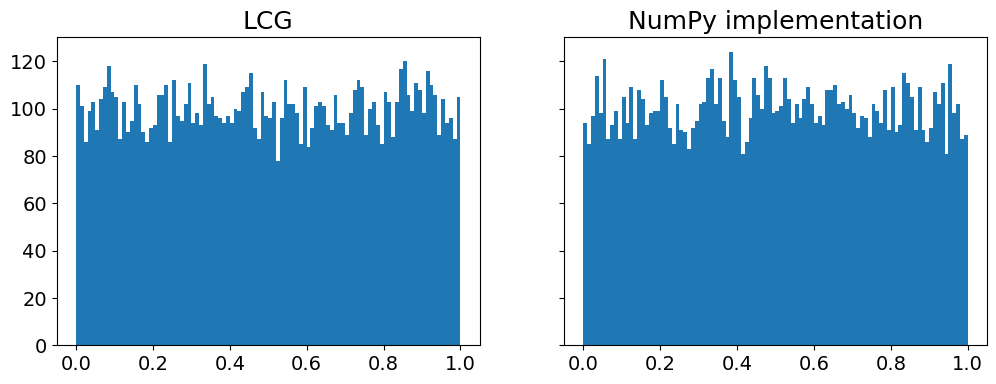

In [15]:

# Generate uniform pseudorandom numbers
U = I/float(m)
f, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize = (12,4))
ax1.hist(U, bins = 100)
ax1.set_title('LCG', fontsize = 18)
ax2.hist(np.random.rand(runs+1), bins = 100)
ax2.set_title('NumPy implementation', fontsize = 18)

### Generate uniform distribution between $[\alpha,\beta]$

Given random numbers $U_j \sim \text{Uniform}(0,1)$ we can transform it into $X_j \sim \text{Uniform}(\alpha,\beta)$
using the transformation

$$ X_j = \alpha + (\beta-\alpha)\times U_j \qquad j = 1,\dots,n$$


Text(0.5, 1.0, 'Uniform[-1,3]')

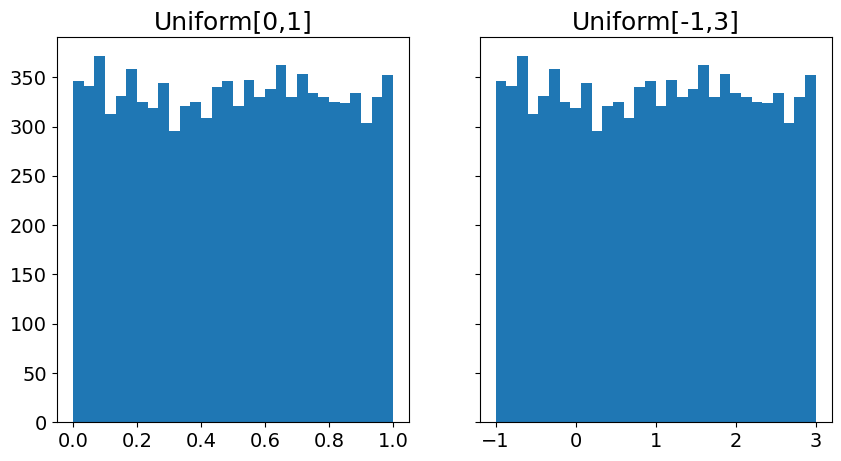

In [16]:
alpha = -1
beta  = 3

U = np.random.rand(10000)
X = alpha + (beta-alpha)*U

f, (ax1,ax2) = plt.subplots(1,2,sharey = True)
h = ax1.hist(U, bins = 30)
ax1.set_title('Uniform[0,1]', fontsize = 18)
h = ax2.hist(X, bins = 30)
ax2.set_title('Uniform[-1,3]', fontsize = 18)

## Discrete random variables

We first show how to simulate Bernoulli random variables which model fair or biased coins. Given a uniform random variable $U \sim \text{Uniform}(0,1)$, we can generate a Bernoulli(p) random variable as 

$$ X = \left\{ \begin{array}{ll} 0 & U  \leq 1 -p \\ 1 & \text{otherwise} \end{array}\right.$$
              
Let us implement this formula:


In [17]:
def bernoulli(p = 0.5, nrvs = 100):
    # p is probability of success
    # nrvs is the number of random variables
    U = np.random.rand(nrvs)
    
    X = np.zeros((nrvs,), dtype = 'd')
    X[np.argwhere(U >= 1- p)] = 1. # X = 0 if U < p, else equals 1
    
    return X

Text(0.5, 1.0, 'Biased coin, p = 0.2')

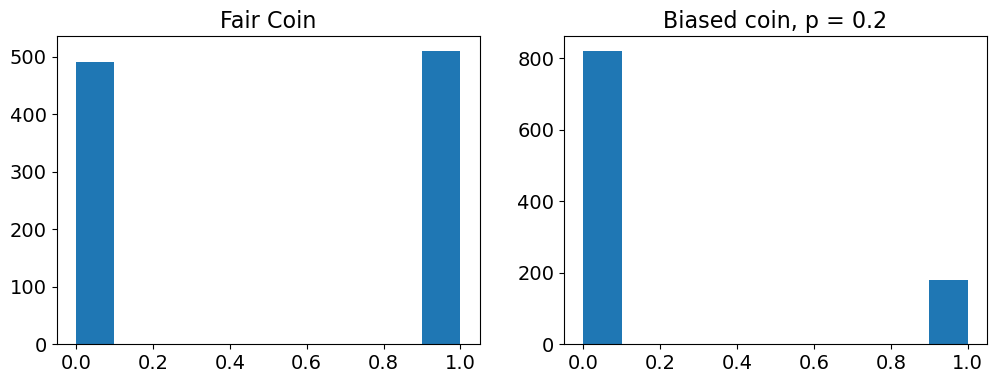

In [18]:

f, (ax1,ax2) = plt.subplots(1,2, figsize = (12, 4))
X = bernoulli(nrvs = 1000)     # Fair coins
ax1.hist(X)
ax1.set_title('Fair Coin', fontsize = 16)              

p = 0.2
X = bernoulli(p = p, nrvs = 1000)     # Biased coins
ax2.hist(X)
ax2.set_title('Biased coin, p = %0.1f' %(p), fontsize = 16) 

## Continuous random variables

Let $X \sim \text{Exponential}(\lambda)$ with the CDF 
 $$ F(x) = \left\{ \begin{array}{ll} 1 - e^{-\lambda x}  & x \geq 0 \\ 0 & x < 0 \end{array}\right. $$
                  
Given a uniform random variable $U \sim \text{Uniform}(0,1)$, we can generate an $\text{Exponential}(\lambda)$ random variable using the "invert the cdf technique" as 
                  $$ X = F^{-1}(U) = - \frac{\log(1- U )}{\lambda} $$. 
                  
Let us implement this formula:

Text(0.5, 1.0, 'PDF of Exponential(5)')

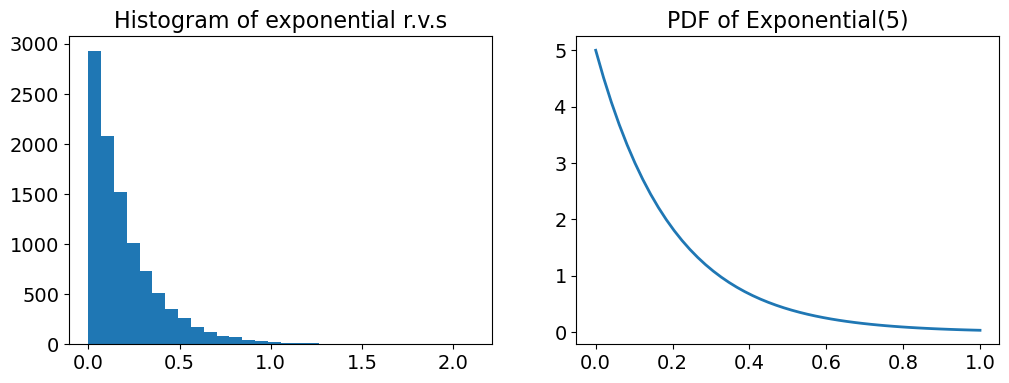

In [19]:
U = np.random.rand(10000)
Lambda = 5.
X = -np.log(1-U)/Lambda


f, (ax1,ax2) = plt.subplots(1,2, figsize = (12, 4))
ax1.hist(X, bins = 30)
ax1.set_title('Histogram of exponential r.v.s', fontsize = 16)
x = np.linspace(0,1)
fx = Lambda*np.exp(-Lambda*x)
ax2.plot(x, fx, lw = 2.)
ax2.set_title('PDF of Exponential(%g)'%(Lambda), fontsize = 16)


## Box-Mueller transforms for normal random variables

Let $U_1$ and $U_2$ be two independent random variables uniformly distributed in $[0, 1]$. Then, it can be shown that 

$$X_1 = \sqrt{-2\log U_1} \cos(2\pi U_2) \qquad X_2 =  \sqrt{-2\log U_1} \sin(2\pi U_2),$$

are independent standard Normal$(0,1)$ random variables . 

Text(0.5, 1.0, 'Scatter plot')

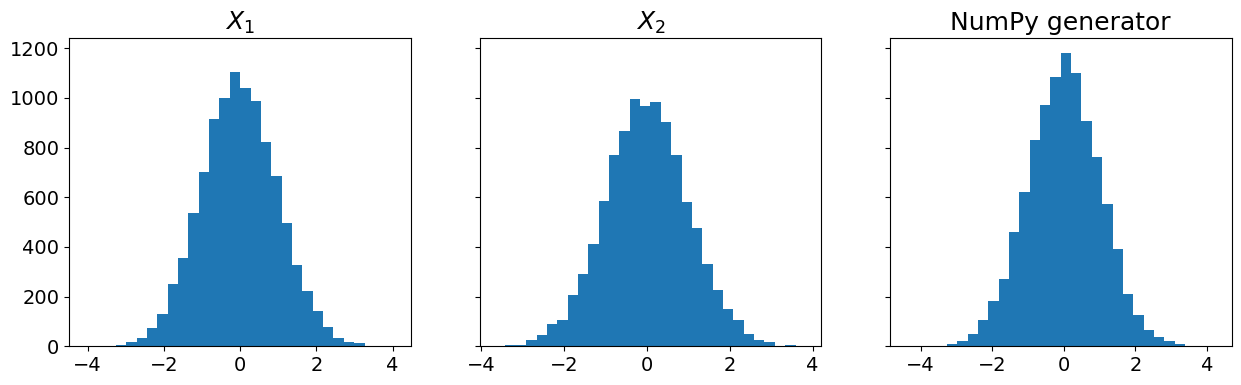

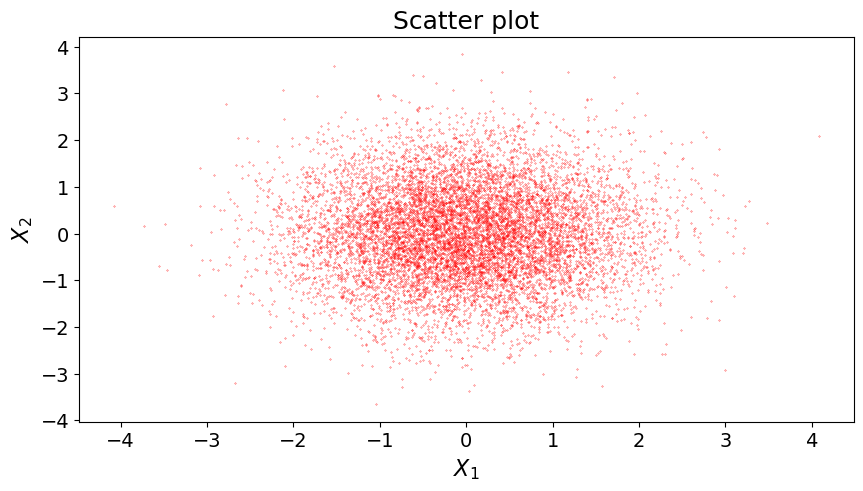

In [20]:
Y = np.random.rand(10000,2)

X1 = np.sqrt(-2*np.log(Y[:,0]))*np.cos(2*np.pi*Y[:,1])
X2 = np.sqrt(-2*np.log(Y[:,0]))*np.sin(2*np.pi*Y[:,1])


f, (ax1,ax2, ax3) = plt.subplots(1,3,sharey = True, figsize = (15,4))
ax1.hist(X1, bins = 30)
ax1.set_title('$X_1$', fontsize = 18)
ax2.hist(X2, bins = 30)
ax2.set_title('$X_2$', fontsize = 18)
ax3.hist(np.random.randn(10000), bins = 30)
ax3.set_title('NumPy generator', fontsize = 18)

plt.figure()
plt.plot(X1,X2, '.r', markersize = 0.5)
plt.xlabel('$X_1$', fontsize = 16 )
plt.ylabel('$X_2$', fontsize = 16 )
plt.title('Scatter plot', fontsize = 18)